## Imports

In [1]:
# The OS module in Python provides functions for interacting with the operating system
import os

# import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tsa statsmodel 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# scipy
from scipy import stats

## Load Data
Data: Monthly median AQI levels of the US from 1980-2022

In [2]:
path = 'C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/processed/median_AQI_monthly.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.head()

,Date,AQI
0,1980-01-31,34.0
1,1980-02-29,38.0
2,1980-03-31,39.0
3,1980-04-30,44.0
4,1980-05-31,50.0


In [3]:
df.set_index('Date', inplace=True)

Text(0.5, 0.98, 'Untransformed Data and its Histogram')

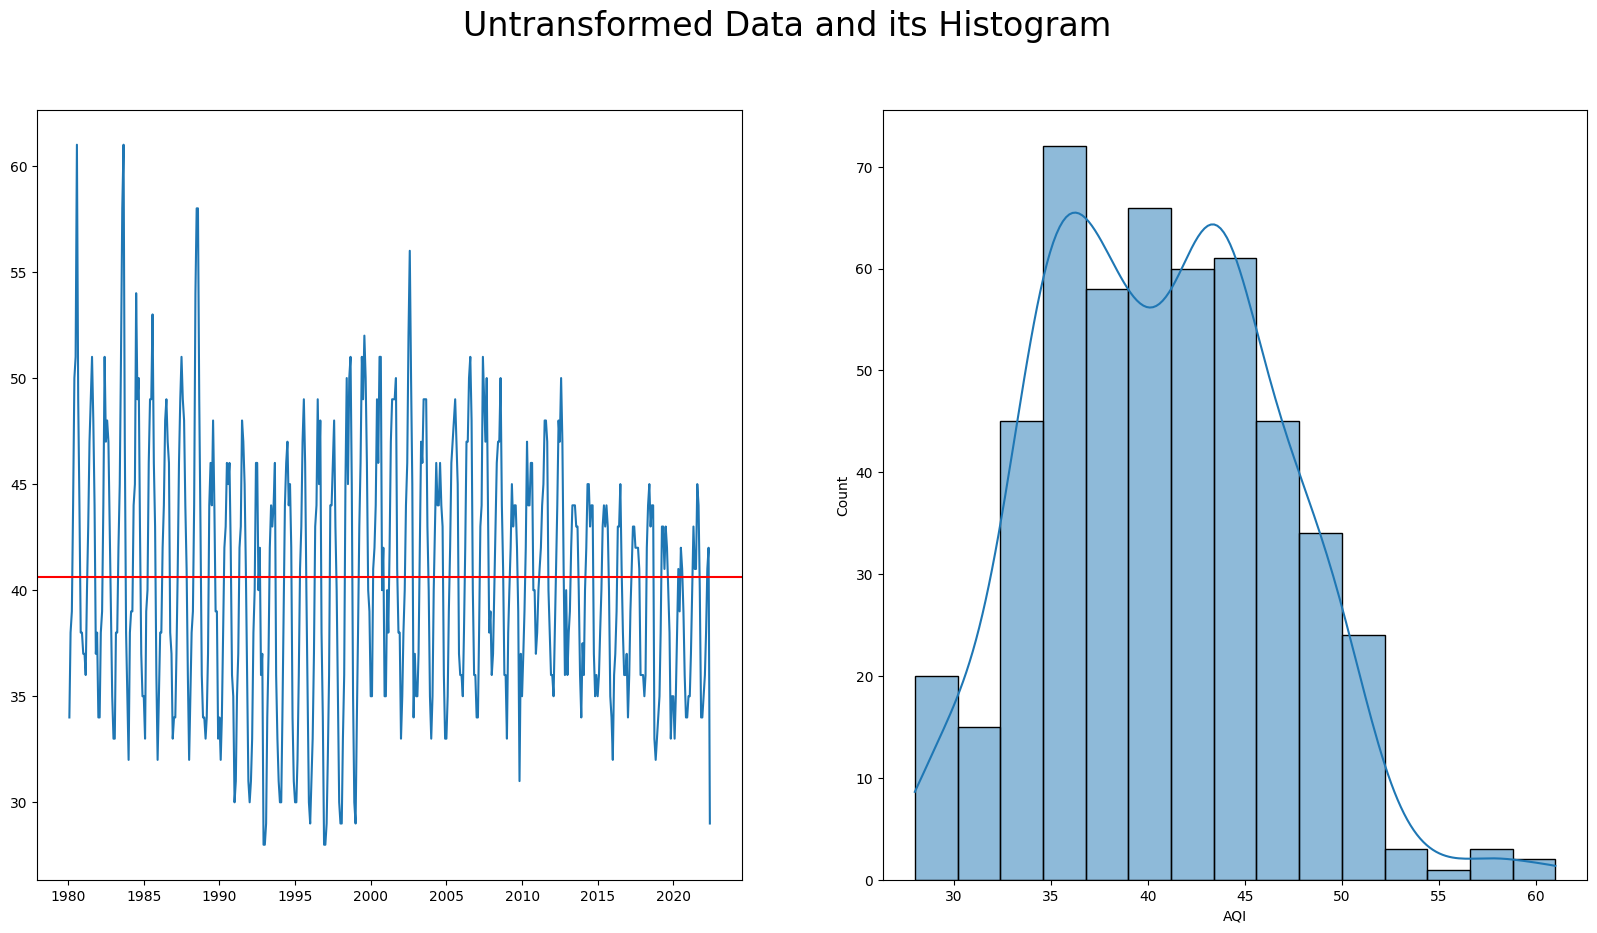

In [4]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(df.AQI)
ax[0].axhline(y=df.AQI.mean(), c='red')
sns.histplot(data=df, x='AQI', bins=15, ax=ax[1], kde=True)
plt.suptitle('Untransformed Data and its Histogram', fontsize=24)

## Transforming the Data

In [5]:
# log transform
df_log = pd.DataFrame({'ds': df.index, 'y_log': np.log(df.AQI)}).set_index('ds')
df_log.head()

,y_log
ds,
1980-01-31,3.526361
1980-02-29,3.637586
1980-03-31,3.663562
1980-04-30,3.784190
1980-05-31,3.912023


Text(0.5, 0.98, 'Log-Transformed Data and its Histogram')

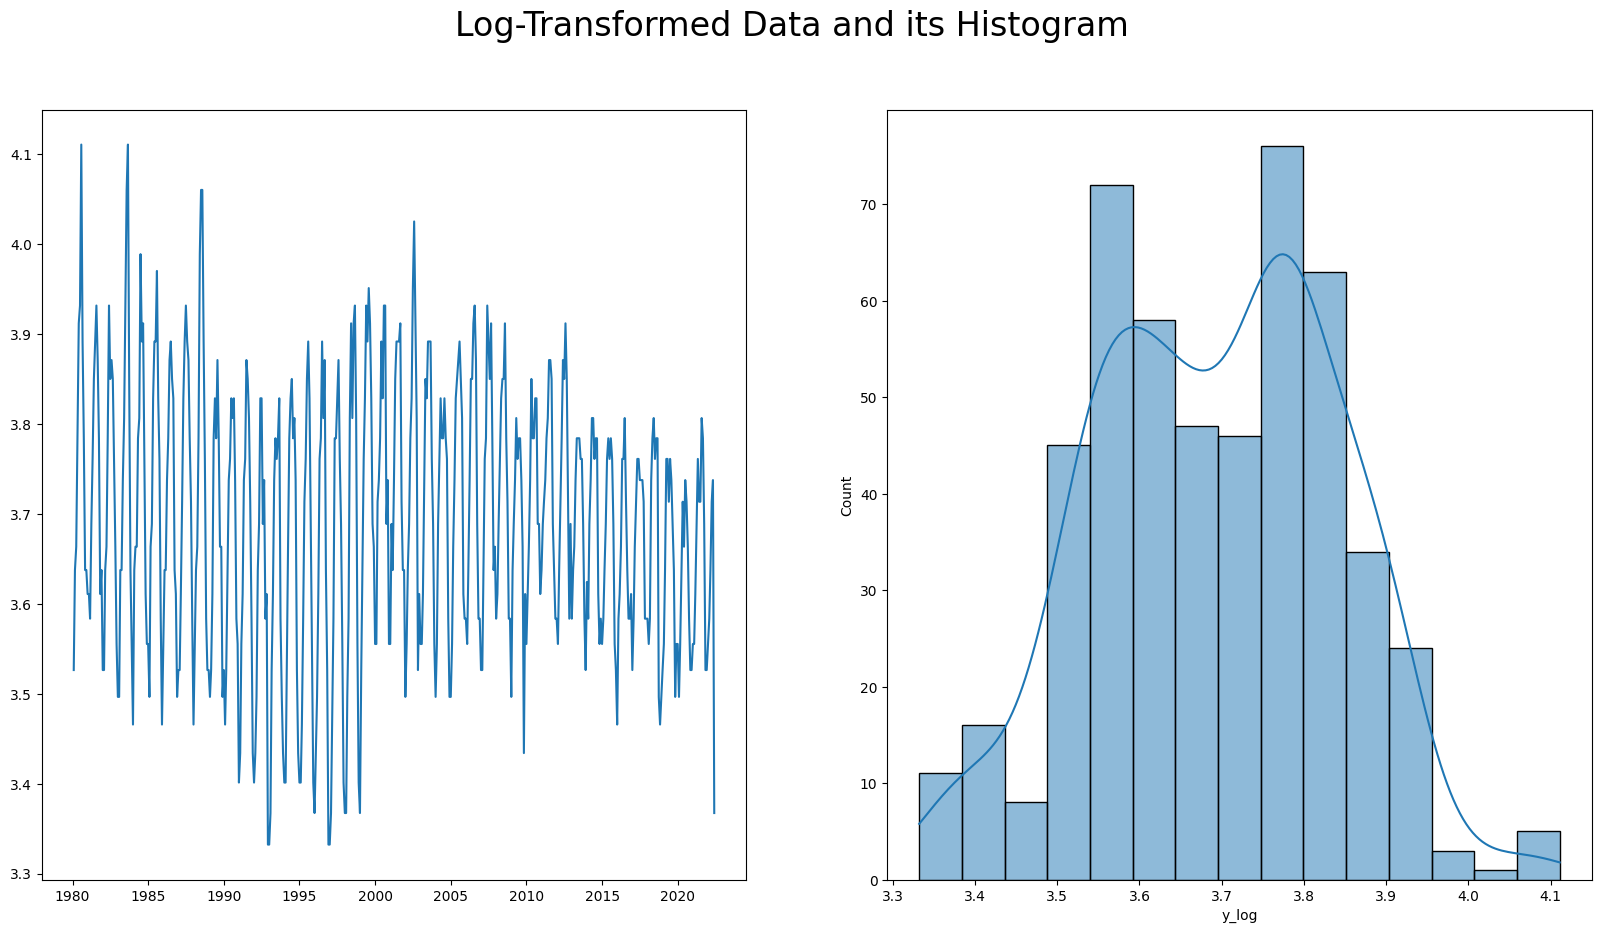

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(df_log.y_log)
#ax[0].axhline(y=df_log.y_log.mean(), c='red')
sns.histplot(data=df_log, x='y_log', bins=15, ax=ax[1], kde=True)
plt.suptitle('Log-Transformed Data and its Histogram', fontsize=24)

In [7]:
# sqrt transform
df_sqrt = pd.DataFrame({'ds': df.index, 'y_sqrt': np.sqrt(df.AQI)}).set_index('ds')
df_sqrt.head()

,y_sqrt
ds,
1980-01-31,5.830952
1980-02-29,6.164414
1980-03-31,6.244998
1980-04-30,6.633250
1980-05-31,7.071068


Text(0.5, 0.98, 'Sqrt-Transformed Data and its Histogram')

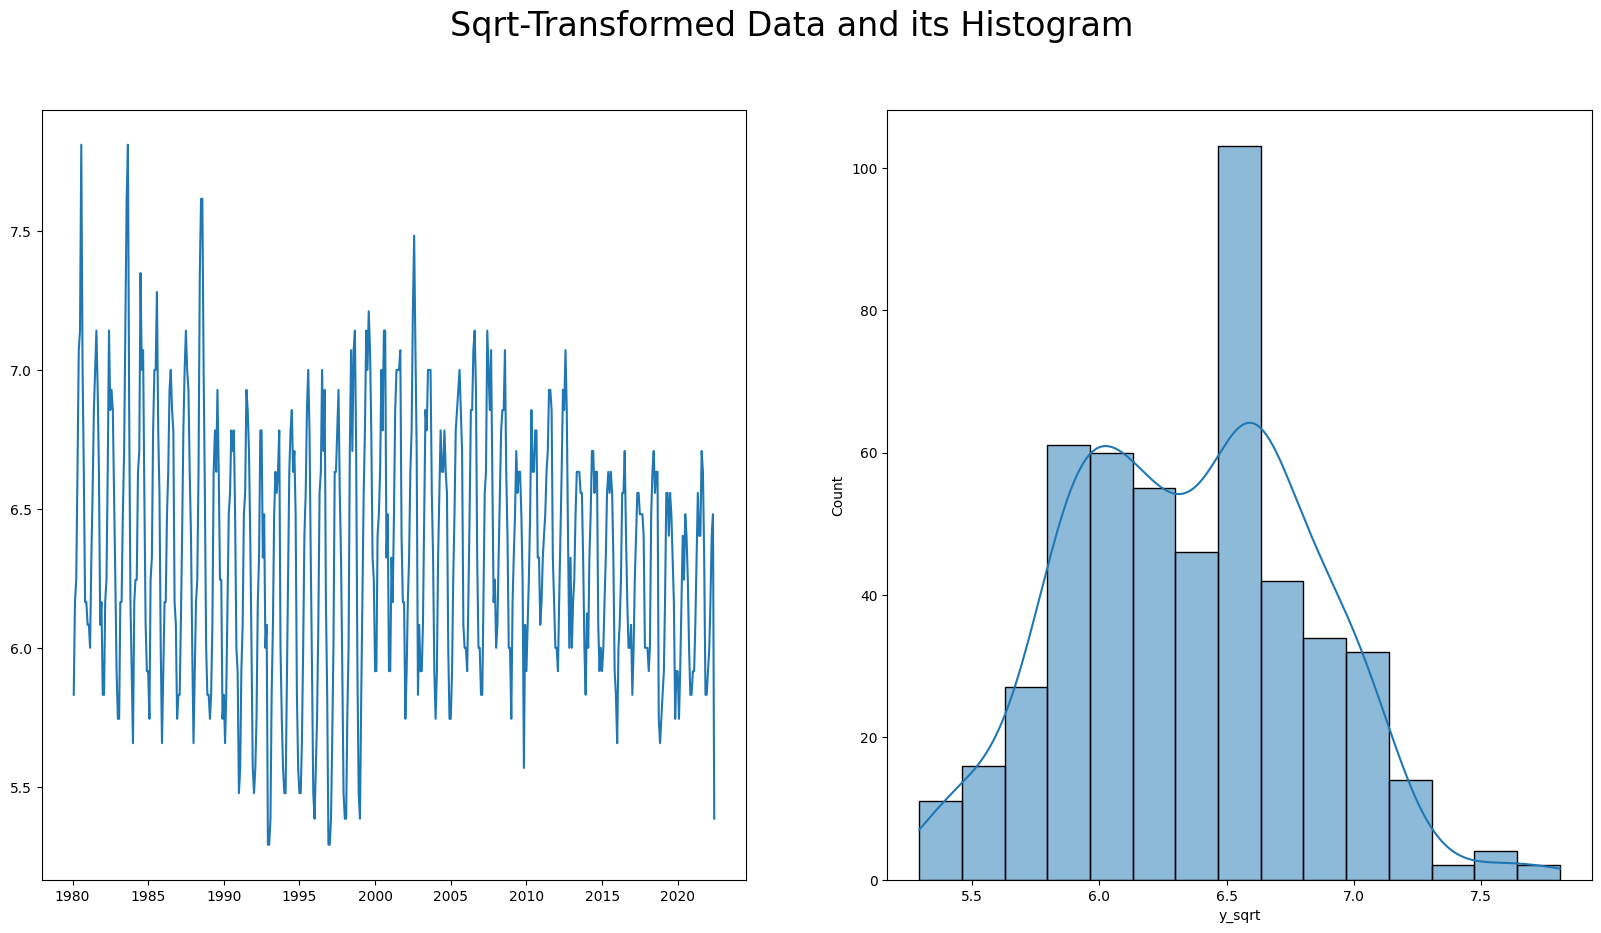

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(df_sqrt.y_sqrt)
sns.histplot(data=df_sqrt, x='y_sqrt', bins=15, ax=ax[1], kde=True)
plt.suptitle('Sqrt-Transformed Data and its Histogram', fontsize=24)

df_log looks the closest to 'normal' so far...

In [9]:
# box-cox transform

index = df.index
boxcox_data, best_lambda = stats.boxcox(df.AQI)

df_bc = pd.DataFrame(boxcox_data,index = df.index, columns=['AQI'])
df_bc.head()

,AQI
Date,
1980-01-31,5.513483
1980-02-29,5.773496
1980-03-31,5.835213
1980-04-30,6.126856
1980-05-31,6.445157


Text(0.5, 0.98, 'Optimal BoxCox-transformed Data and its Histogram')

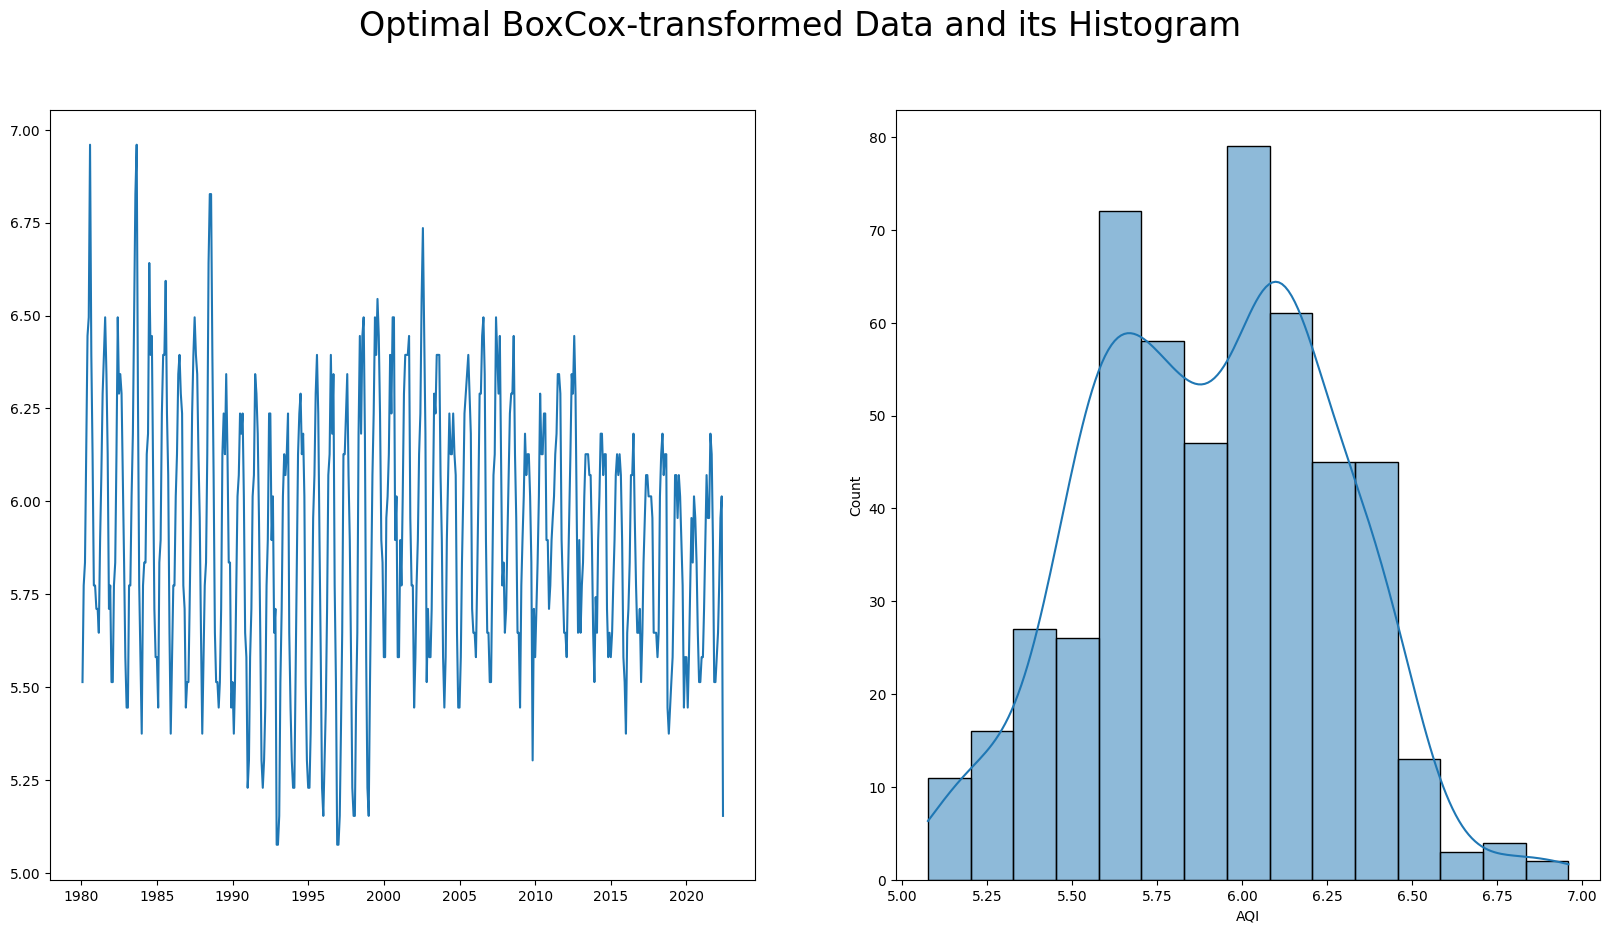

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(df_bc.AQI)
sns.histplot(data=df_bc, x='AQI', bins=15, ax=ax[1], kde=True)
plt.suptitle('Optimal BoxCox-transformed Data and its Histogram', fontsize=24)

In [11]:
print('Optimal lambda value: ', best_lambda)

Optimal lambda value:  0.23706028832402673


## Decomposition and ACF/ PACF for df_log

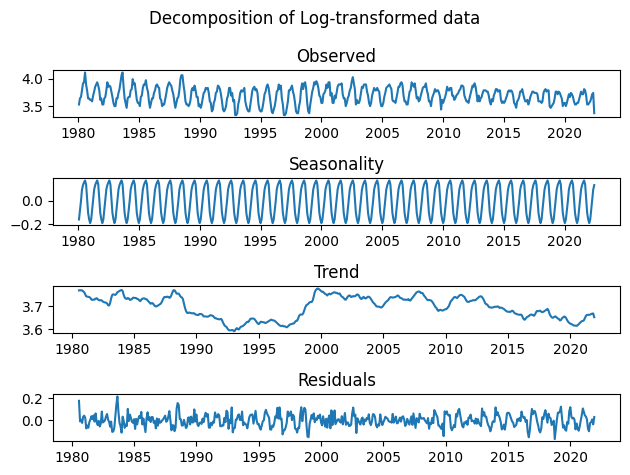

In [12]:
log_decomp = seasonal_decompose(df_log)
fig, ax = plt.subplots(4)
fig.suptitle('Decomposition of Log-transformed data')

ax[0].plot(log_decomp.observed)
ax[0].set_title('Observed')

ax[1].plot(log_decomp.seasonal)
ax[1].set_title('Seasonality')

ax[2].plot(log_decomp.trend)
ax[2].set_title('Trend')

ax[3].plot(log_decomp.resid)
ax[3].set_title('Residuals')

fig.tight_layout()
plt.show()

C:\Users\KNguyen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


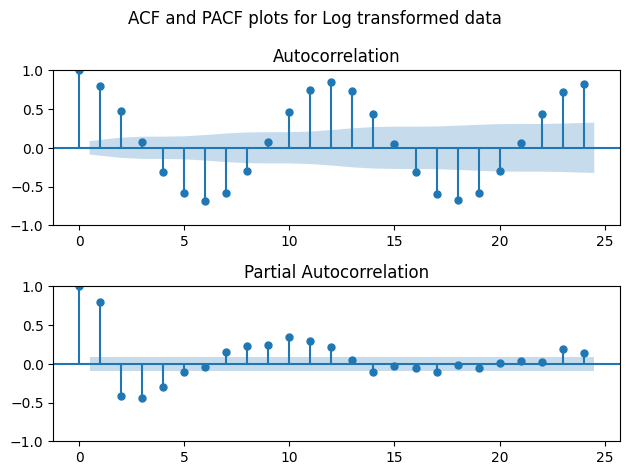

Variance:  0.021981837633514852


In [13]:

%matplotlib inline

fig, ax = plt.subplots(2,1)

plot_acf(df_log.y_log, lags=24, ax=ax[0])

plot_pacf(df_log.y_log, lags=24, ax=ax[1])

plt.suptitle('ACF and PACF plots for Log transformed data')

fig.tight_layout()
plt.show()


print('Variance: ', df_log.y_log.var())

#### Differencing with df_log

Variance:  0.005349176325830712


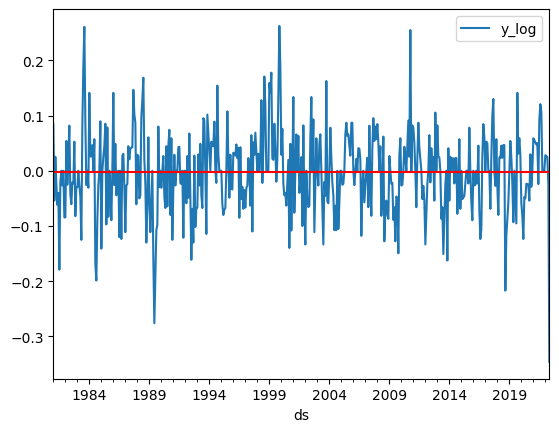

In [14]:
# seasonal difference

df_log_diff12 = df_log.diff(12)

df_log_diff12.dropna().plot()

plt.axhline(y=df_log_diff12.y_log.mean(), color ='r')

print('Variance: ', df_log_diff12.y_log.var()) # smaller than df_log's, good

Variance:  0.007253282651904926


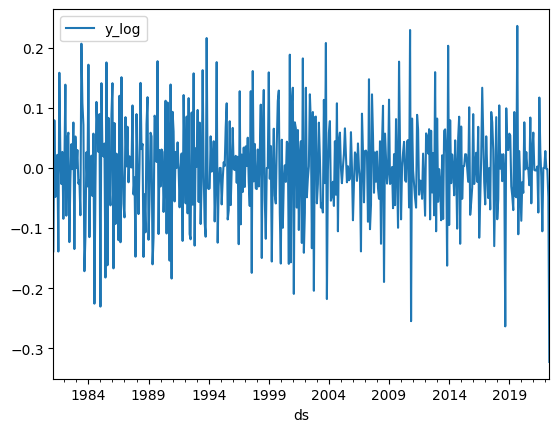

In [15]:
# trend difference

df_log_diff12_diff = df_log_diff12.diff()

df_log_diff12_diff.dropna().plot()

print('Variance: ', df_log_diff12_diff.y_log.var()) # larger than df_log_diff12's, bad
# keep df_log_diff12 without the trend difference

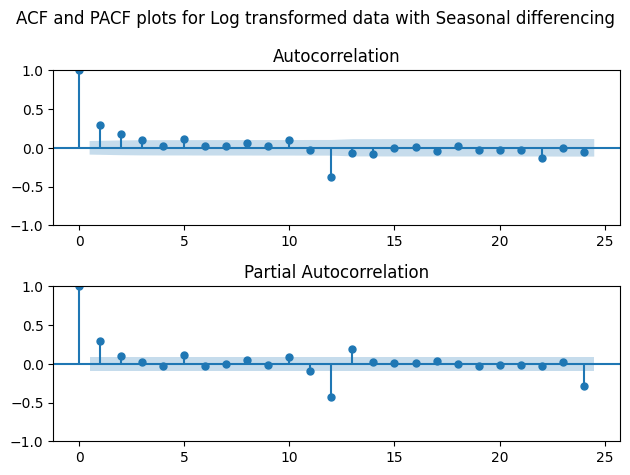

In [16]:
%matplotlib inline

fig, ax = plt.subplots(2,1)

plot_acf(df_log_diff12.y_log.dropna(), lags=24, ax=ax[0])

plot_pacf(df_log_diff12.y_log.dropna(), lags=24, ax=ax[1])

plt.suptitle('ACF and PACF plots for Log transformed data with Seasonal differencing')

fig.tight_layout()
plt.show()


## Decomposition and ACF/ PACF for df_bc

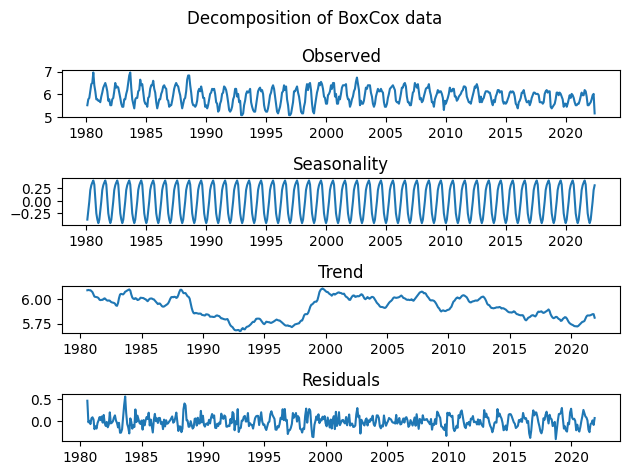

In [17]:
bc_decomp = seasonal_decompose(df_bc)
fig, ax = plt.subplots(4)
fig.suptitle('Decomposition of BoxCox data')

ax[0].plot(bc_decomp.observed)
ax[0].set_title('Observed')

ax[1].plot(bc_decomp.seasonal)
ax[1].set_title('Seasonality')

ax[2].plot(bc_decomp.trend)
ax[2].set_title('Trend')

ax[3].plot(bc_decomp.resid)
ax[3].set_title('Residuals')

fig.tight_layout()
plt.show()

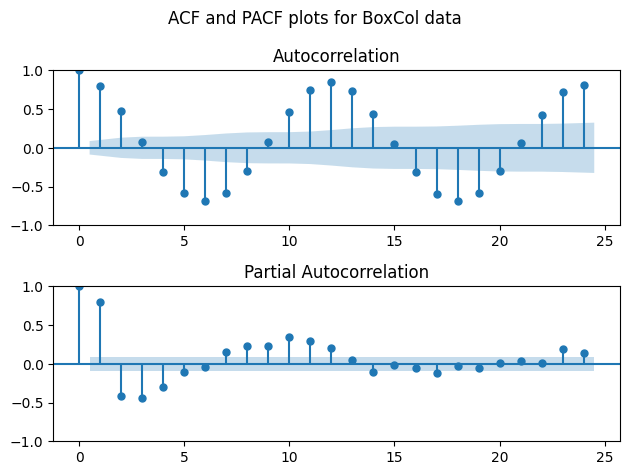

Variance:  0.126435602644882


In [18]:
%matplotlib inline

fig, ax = plt.subplots(2,1)

plot_acf(df_bc.AQI, lags=24, ax=ax[0])

plot_pacf(df_bc.AQI, lags=24, ax=ax[1])

plt.suptitle('ACF and PACF plots for BoxCol data')

fig.tight_layout()
plt.show()


print('Variance: ', df_bc.AQI.var())

#### Differencing with df_bc

Variance:  0.031171921741034156


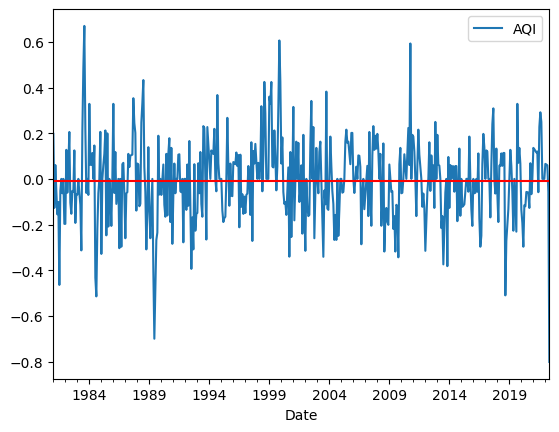

In [19]:
# seasonal difference

df_bc_diff12 = df_bc.diff(12)

df_bc_diff12.dropna().plot()

plt.axhline(y=df_bc_diff12.AQI.mean(), color ='r')

print('Variance: ', df_bc_diff12.AQI.var()) # smaller than variance of df_bc, good

Variance:  0.041955477324719666


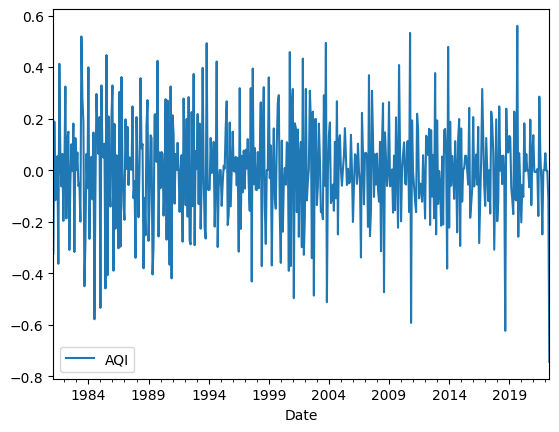

In [20]:
# trend difference

df_bc_diff12_diff = df_bc_diff12.diff()

df_bc_diff12_diff.dropna().plot()

print('Variance: ', df_bc_diff12_diff.AQI.var()) # larger than previous variance, bad
# keep df_bc_diff12 without the trend difference

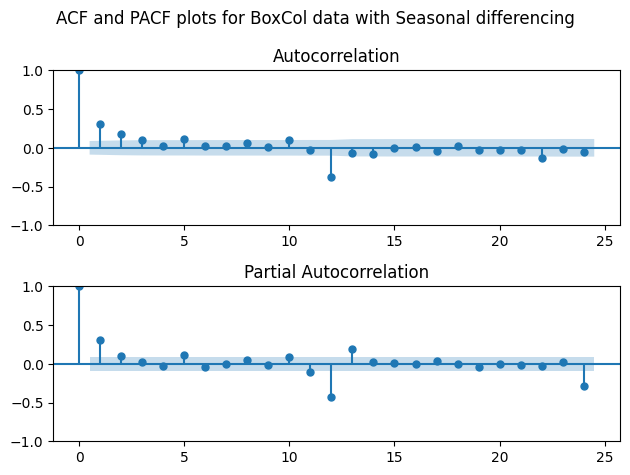

In [21]:
%matplotlib inline

fig, ax = plt.subplots(2,1)

plot_acf(df_bc_diff12.AQI.dropna(), lags=24, ax=ax[0])

plot_pacf(df_bc_diff12.AQI.dropna(), lags=24, ax=ax[1])

plt.suptitle('ACF and PACF plots for BoxCol data with Seasonal differencing')

fig.tight_layout()
plt.show()


In [22]:
# save all the transformed data, just in case we need them

df.to_csv('C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/processed/median_AQI_untransformed.csv')
df_log.to_csv('C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/processed/median_AQI_log.csv')
df_sqrt.to_csv('C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/processed/median_AQI_sqrt.csv')
df_bc.to_csv('C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/processed/median_AQI_bc.csv')

